## Binary Classification

#### Id is primary key for the dataset so is irrelevent in the classification and so is removed

In [27]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('binary_classification_ds.csv')
x = df[df.columns[1:-1]]
y = df['target']


#### I am using decision tree for binary classification. After going through the data, I got to know that each variable has different significance on the target value. Naive Bayes and Logistic regression doesn't consider impact of each variable on the output. These algorithms assume that every variable has same impact on the output, which is not true in the case of classification. 

### Advantages of decision tree:
#### 1) It does classification for the data having categorical variables as well.
#### 2) It gives higher level to the variables having higher significance in the generated decision tree.
#### 3) Decision tree works better for the complex data as it chops data parallel to axis, unlike logistic regression
#### 4) It doesn't decision based on maximum likelihood which again can supress effect of dominating variables.
#### 5) Works better if number of variables are large.
#### 6) Require little efforts in data preparation from user.
#### 7) Easier to interpret
#### 8) Ignores outliers better than any other algorithm.
<br>

### Disadvantages of decision tree:
#### 1) Execution time is higher if depth of the tree is increased significantly to get higher precision.
#### 2) When decrease in impurity of tree is very small, this user input parameter leads to termination of tree when impurity drops by very small amount, say, 0.001 or lesser.
<br>
#### Lets compare different algorithms using 5- fold cross validation

In [28]:
dt = tree.DecisionTreeClassifier()
DTscores = cross_val_score(estimator=dt, X=x, y=y, cv=5, n_jobs=4)
print('Cross-Validation error for decision tree classification:\n',DTscores)
print('Mean:',DTscores.mean())
print('\n')
gnb = GaussianNB()
GNBscores = cross_val_score(estimator=gnb, X=x, y=y, cv=5, n_jobs=4)
print('Cross-Validation error for Gaussian Naive Bayes classification:\n',GNBscores)
print('Mean:',GNBscores.mean())
print('\n')
logisticRegr = LogisticRegression()
LRscores = cross_val_score(estimator=logisticRegr, X=x, y=y, cv=5, n_jobs=4)
print('Cross-Validation error for logistic regression classification:\n',LRscores)
print('Mean:',LRscores.mean())

Cross-Validation error for decision tree classification:
 [ 0.93010699  0.92770723  0.9309      0.9319932   0.93029303]
Mean: 0.93020008944


Cross-Validation error for Gaussian Naive Bayes classification:
 [ 0.48005199  0.47375262  0.4902      0.47554755  0.51315132]
Mean: 0.486540697885


Cross-Validation error for logistic regression classification:
 [ 0.96680332  0.96690331  0.9668      0.96709671  0.96689669]
Mean: 0.966900005735


#### <font color=blue>Reason for using 5 folds in Cross validation:</font> Generally using a number multiple of number of datapoints helps in equal division. Using 10 folds with 104 number of variables might have increased complexity and time of training the model
<br>
#### Even though logistic regression is giving more accuracy for this classification than other selected algorithm, it is not considerring importance of every feature. If data had more randomness or outliers, logistic regression would have failed. Naive bayes is giving very low accuracy as expected, as it is working based on probability which might overfit the model later. 
<br>
#### <font color=blue>Increasing accuracy of DT model:</font> By changing depth of the decision tree, accuracy can be increased for this model. Changing the algorithm which is not inclined with the requirement of the dataset, is not the great choice. By default decision tree classifier algorithm in sklearn uses depth of the tree= None, which means it keeps growing until all leaves are pure or each leaf contains less than 2 samples. 

In [32]:
for i in range(3,25):
    clfnew = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator=clfnew, X=x, y=y, cv=5, n_jobs=4)
    print((i,scores.mean()))

(3, 0.96690000173540014)
(4, 0.96676000573419996)
(5, 0.96638001173120003)
(6, 0.96598002372840031)
(7, 0.96562001372420014)
(8, 0.96484003171840038)
(9, 0.96402002771160034)
(10, 0.96368004971020049)
(11, 0.96232004169940022)
(12, 0.9613800796928007)
(13, 0.96016005568160057)
(14, 0.95856008367120094)
(15, 0.95760005366540057)
(16, 0.9553400576474006)
(17, 0.95394002363480035)
(18, 0.95242006161900061)
(19, 0.95072000560620007)
(20, 0.94884004758920037)
(21, 0.94651996557179974)
(22, 0.94393998954659997)
(23, 0.9427600815382009)
(24, 0.94114000752640015)


#### After checking till 25th level of the tree, we conclude that optimal depth of the tree is 15. Choosing less depth is visually giving us more accuracy as of now, but it wont consider all/enough variables for the decision making. 

### Splitted data in 4:1 ratio for training and testing set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)

In [30]:
X_train.shape, y_train.shape

((40000, 102), (40000,))

In [31]:
X_test.shape, y_test.shape

((10000, 102), (10000,))

### Training decision tree model on 80% of data till the depth of 15.

In [33]:
clf = tree.DecisionTreeClassifier(max_depth=15)
clf = clf.fit(X_train, y_train)

### Testing trained model of remaining 20% of the data

In [34]:
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

0.9559


array([[9545,  117],
       [ 324,   14]])

### Testing accuracy on the data which is used for training the model itself

In [35]:
y_pred=clf.predict(X_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

0.976975


array([[38679,     6],
       [  915,   400]])

#### From the above two cells we can observe that training and test set accuracies are very close. We can conclude that model is not overfitted as it is not restricted for only training set. It is working well in the case of new data(test set is not used for training model) as well. 

### Feature importance calculated by decision tree

In [52]:

fi=clf.feature_importances_.tolist()
featImp= pd.DataFrame(
    {
     'feature': x.columns,
    'IMP': fi
    })
featImp.sort_values(['IMP'],ascending=0)

,IMP,feature
23,0.088735,col_25
61,0.065668,col_82
58,0.059521,col_122
0,0.055669,col_24
65,0.048848,col_110
4,0.042246,col_39
79,0.037619,col_84
52,0.033292,col_18
95,0.030072,col_53
100,0.029913,col_990


### Graphically showing generated decision tree

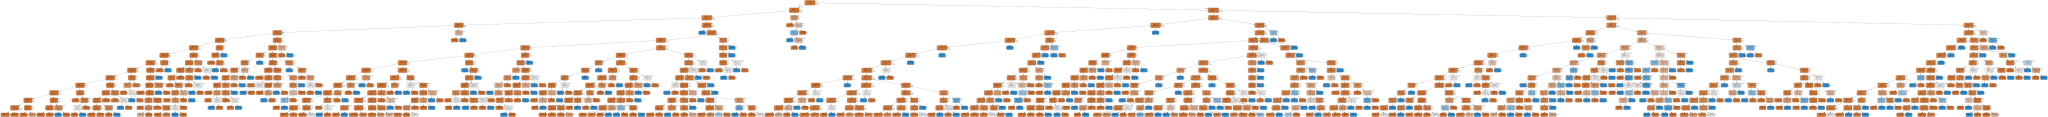

In [37]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("binaryClass") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=df.columns[1:-1],  
                           
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 